# 💸 Forest-Cover-Prediction-by-Machine-Learning💰

## Welcome to my Capstone Project — Forest Cover Prediction using Machine Learning.
### Predictive Modelling for finding forest cover type of a given area based on cartographic and environmental features such as elevation, slope, soil type, and proximity to water bodies, roads.

### The Target classes  are:

#### 1.Spruce/Fir

#### 2.Lodgepole Pine

#### 3.Ponderosa Pine

#### 4.Cottonwood/Willow

#### 5.Aspen

#### 6.Douglas‐fir

#### 7.Krummholz 


###  Importing All the basic necessary Libraries 

In [19]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import Pipeline 
from sklearn.decomposition import PCA # PCA is useful for large feature sets like Covertype

### 1️⃣ Stage 1 : Data Understanding & Cleaning

In [7]:
# Load the dataset
# As per scikit-learn documentation, fetch_covtype() automatically scales the continuous features.
# However, we will use StandardScaler in the pipeline for consistency across all features.
covtype = fetch_covtype() 
X = pd.DataFrame(covtype.data, columns=covtype.feature_names)
y = pd.Series(covtype.target, name="cover_type") # Target is the forest cover type (7 classes)

# Combine both into one DataFrame
df = pd.concat([X, y], axis=1)

print(df.head())
print(f"Dataset shape: {X.shape}")
print(f"Target classes: {np.unique(y)}")
print("-" * 50)


   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0     2596.0    51.0    3.0                             258.0   
1     2590.0    56.0    2.0                             212.0   
2     2804.0   139.0    9.0                             268.0   
3     2785.0   155.0   18.0                             242.0   
4     2595.0    45.0    2.0                             153.0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                             0.0                            510.0   
1                            -6.0                            390.0   
2                            65.0                           3180.0   
3                           118.0                           3090.0   
4                            -1.0                            391.0   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0          221.0           232.0          148.0   
1          220.0           235.0          151.0   
2          234.0           238.0   

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  float64
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  Wilderness_Area_0                   581012 non-null  float64
 11  Wilderness_Area_1         

In [10]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,cover_type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [11]:
## Shape of the Dataset

print (f'Number of rows in a Dataset : {df.shape[0]}')
print (f'Number of columns in a Dataset :{df.shape[1]}')

Number of rows in a Dataset : 581012
Number of columns in a Dataset :55


In [12]:
df.columns.tolist()

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area_0',
 'Wilderness_Area_1',
 'Wilderness_Area_2',
 'Wilderness_Area_3',
 'Soil_Type_0',
 'Soil_Type_1',
 'Soil_Type_2',
 'Soil_Type_3',
 'Soil_Type_4',
 'Soil_Type_5',
 'Soil_Type_6',
 'Soil_Type_7',
 'Soil_Type_8',
 'Soil_Type_9',
 'Soil_Type_10',
 'Soil_Type_11',
 'Soil_Type_12',
 'Soil_Type_13',
 'Soil_Type_14',
 'Soil_Type_15',
 'Soil_Type_16',
 'Soil_Type_17',
 'Soil_Type_18',
 'Soil_Type_19',
 'Soil_Type_20',
 'Soil_Type_21',
 'Soil_Type_22',
 'Soil_Type_23',
 'Soil_Type_24',
 'Soil_Type_25',
 'Soil_Type_26',
 'Soil_Type_27',
 'Soil_Type_28',
 'Soil_Type_29',
 'Soil_Type_30',
 'Soil_Type_31',
 'Soil_Type_32',
 'Soil_Type_33',
 'Soil_Type_34',
 'Soil_Type_35',
 'Soil_Type_36',
 'Soil_Type_37',
 'Soil_Type_38',
 'Soil_Type_39',
 'cov

In [13]:
### Checking for unique values 
df.nunique()

Elevation                             1978
Aspect                                 361
Slope                                   67
Horizontal_Distance_To_Hydrology       551
Vertical_Distance_To_Hydrology         700
Horizontal_Distance_To_Roadways       5785
Hillshade_9am                          207
Hillshade_Noon                         185
Hillshade_3pm                          255
Horizontal_Distance_To_Fire_Points    5827
Wilderness_Area_0                        2
Wilderness_Area_1                        2
Wilderness_Area_2                        2
Wilderness_Area_3                        2
Soil_Type_0                              2
Soil_Type_1                              2
Soil_Type_2                              2
Soil_Type_3                              2
Soil_Type_4                              2
Soil_Type_5                              2
Soil_Type_6                              2
Soil_Type_7                              2
Soil_Type_8                              2
Soil_Type_9

In [14]:
### Checking for unique values in each column
for column in df.columns :
    unique_values=df[column].unique()
    print (f'Column Name:{column}')
    print (f'Unique values({len(unique_values)}):{unique_values}')
    print (' -------------------------- ')
    print()

Column Name:Elevation
Unique values(1978):[2596. 2590. 2804. ... 3858. 3856. 3852.]
 -------------------------- 

Column Name:Aspect
Unique values(361):[ 51.  56. 139. 155.  45. 132.  49.  59. 201. 151. 134. 214. 157. 259.
  72.   0.  38.  71. 209. 114.  54.  22. 135. 163. 148. 117. 122. 105.
 102.  23.  41. 125.  92.  98. 354. 347. 346. 330. 128.  68.  94.  99.
  66. 100. 323.  79.  81. 315.  74.  11.  42.  75. 107.  90.  40.  63.
  13.  80. 166.   6.  30. 118. 160. 326. 153. 143. 352.  14. 358. 332.
  18. 306. 173.  31. 164.  34.  84. 170. 211.  32.  57. 348. 333. 324.
  88. 111.  53.  58.  76.  17. 124. 119. 320. 112.  83.   1.  37. 356.
 307.   7.  12. 344. 228. 284. 299. 220.   2.  95. 289.  21.  20. 200.
 349. 328. 221. 257. 276. 196. 189. 130. 357.  15.   8. 288. 129.  28.
  86. 292. 115.  29. 180. 116.  46. 256. 338. 127. 319.  89.  43. 188.
  50. 138. 312.   9.  10.  36. 167. 260. 187. 279. 245.  27. 359.  16.
  48. 149.  60.  77. 230. 152.  70. 325. 126. 222. 109.  85.  25. 1

In [15]:
## checking the length of the data 
len(df)

581012

In [16]:
### Checking for duplicated values 

df.duplicated().sum()

np.int64(0)

In [17]:
# Count missing values in each column
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_0                     0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Soil_Type_0                           0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Typ

### 2️⃣ Stage 2 :  Exploratory Data Analysis (EDA)

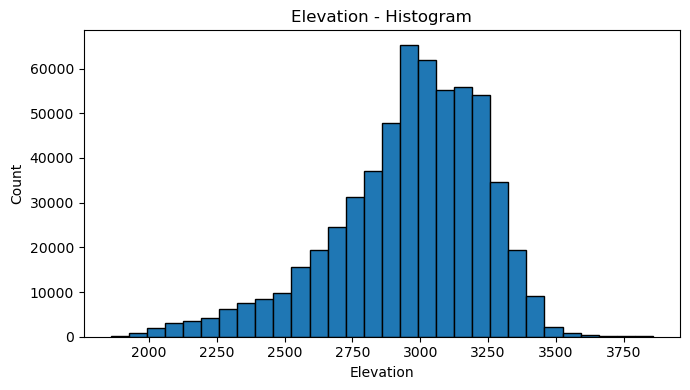

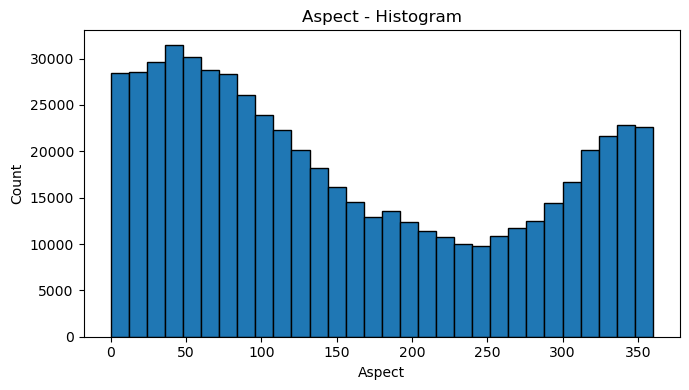

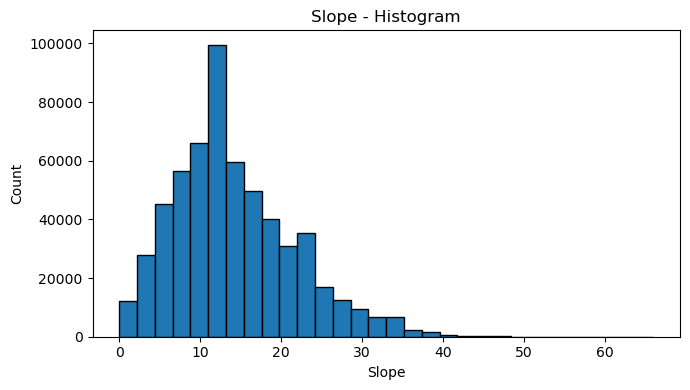

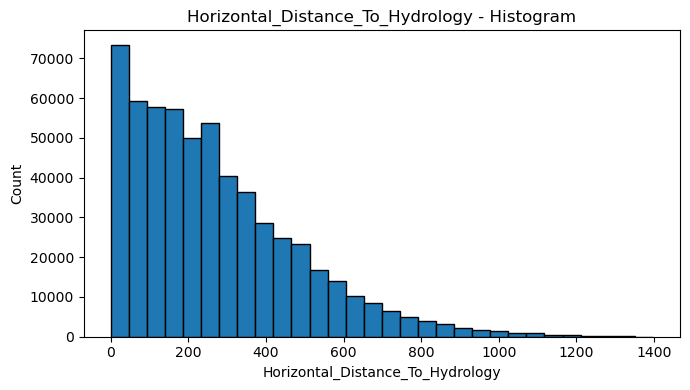

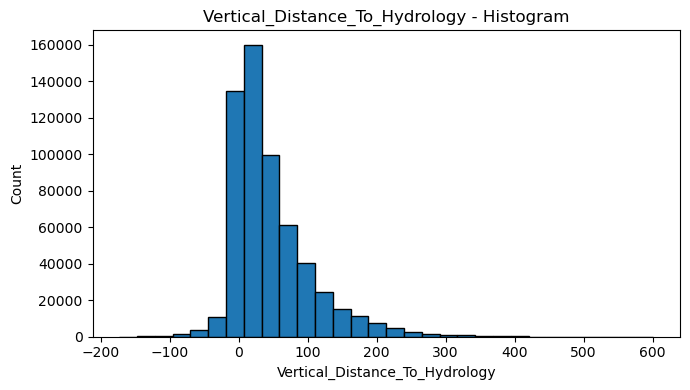

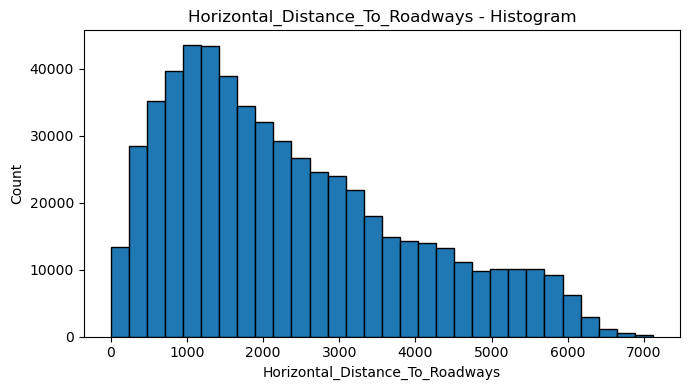

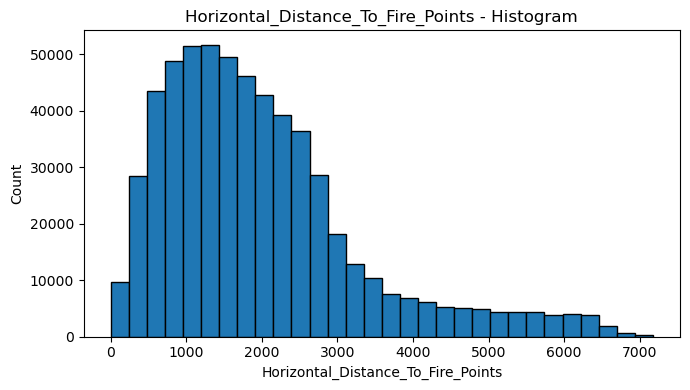

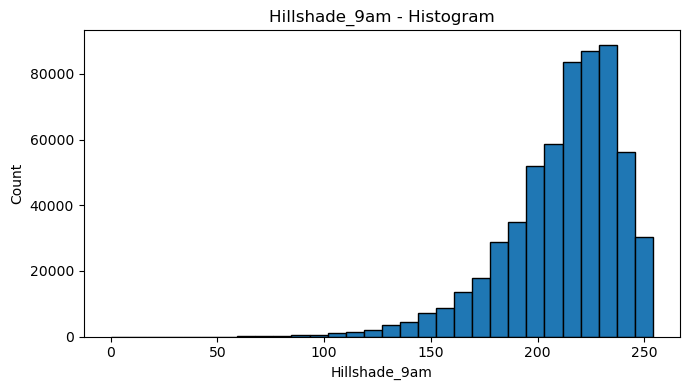

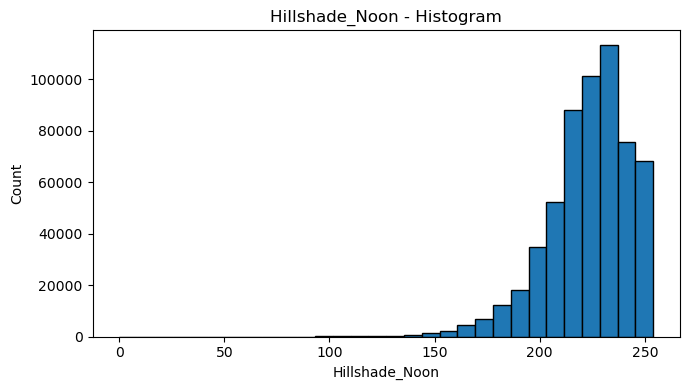

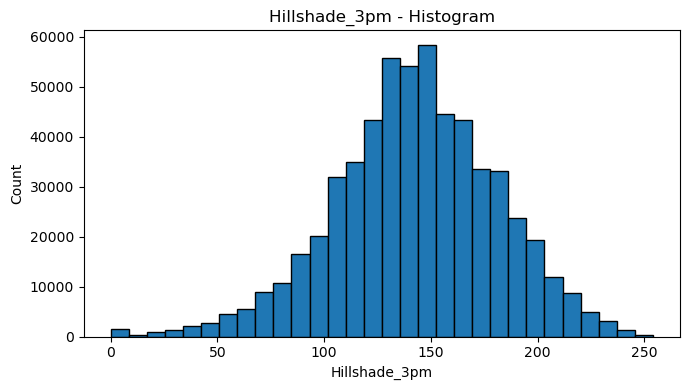

In [20]:
### Histogram to understand the distribution
numeric_cols = [
    "Elevation",
    "Aspect",
    "Slope",
    "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways",
    "Horizontal_Distance_To_Fire_Points",
    "Hillshade_9am",
    "Hillshade_Noon",
    "Hillshade_3pm"
    
]

# Plot histograms
for col in numeric_cols:
    plt.figure(figsize=(7, 4))
    plt.hist(df[col], bins=30, edgecolor='black')
    plt.title(f"{col} - Histogram")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()



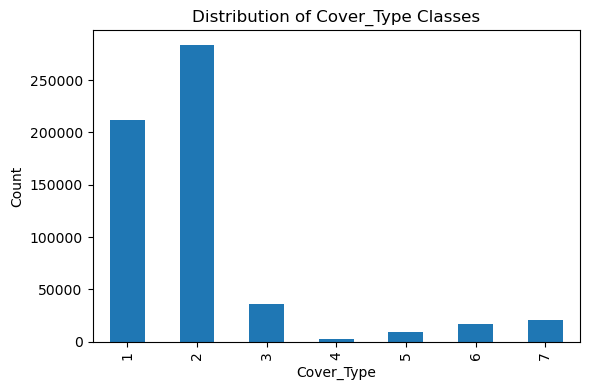

In [24]:
# Plot histogram for Cover_Type
plt.figure(figsize=(6, 4))
df['cover_type'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of Cover_Type Classes")
plt.xlabel("Cover_Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



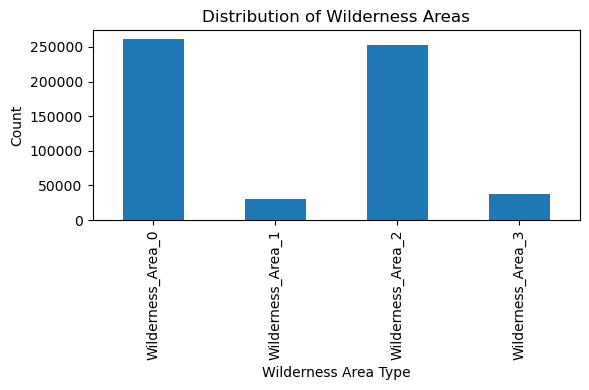

In [23]:
# --- Wilderness Area Histogram ---
wilderness_cols = [col for col in df.columns if col.startswith("Wilderness_Area")]

# Count how many rows have each wilderness area
wilderness_counts = df[wilderness_cols].sum()

# Plot
plt.figure(figsize=(6, 4))
wilderness_counts.plot(kind='bar')
plt.title("Distribution of Wilderness Areas")
plt.xlabel("Wilderness Area Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



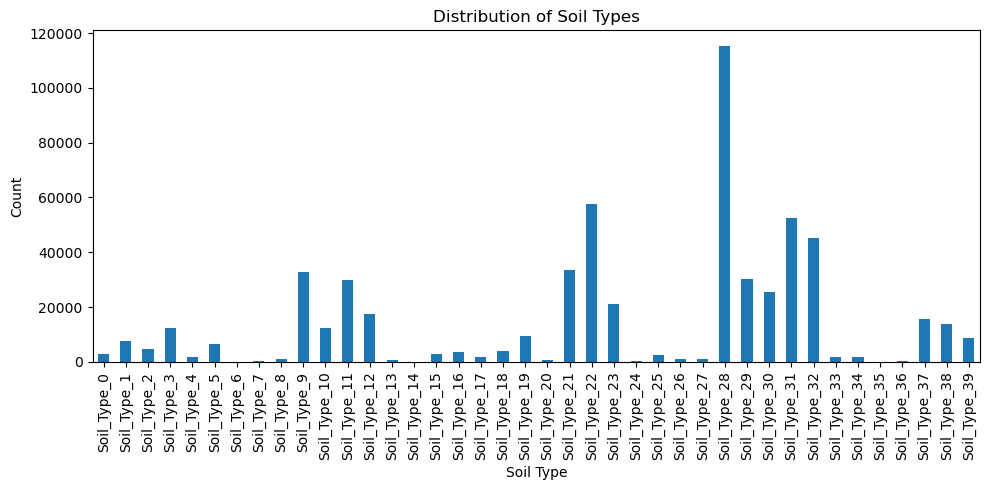

In [25]:
# ---- Soil Type Histogram ----
soil_cols = [col for col in df.columns if col.startswith("Soil_Type")]

# Count how many rows have each soil type
soil_counts = df[soil_cols].sum()

# Plot
plt.figure(figsize=(10, 5))
soil_counts.plot(kind='bar')
plt.title("Distribution of Soil Types")
plt.xlabel("Soil Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



### 3️⃣ Stage 3️: Data Preprocessing

#### According to certain articles and UCI, it says that the covertype dataset is generally clean!
#### The Covertype dataset has 54 features; checking outliers in all of them and defining custom IQR bounds for each is complex. We must also be careful because many of the features are binary.
#### Some numeric features (like Elevation or Horizontal_Distance_To_Fire_Points) have wide ranges, but those variations are meaningful, not anomalies.

Numeric columns: ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']


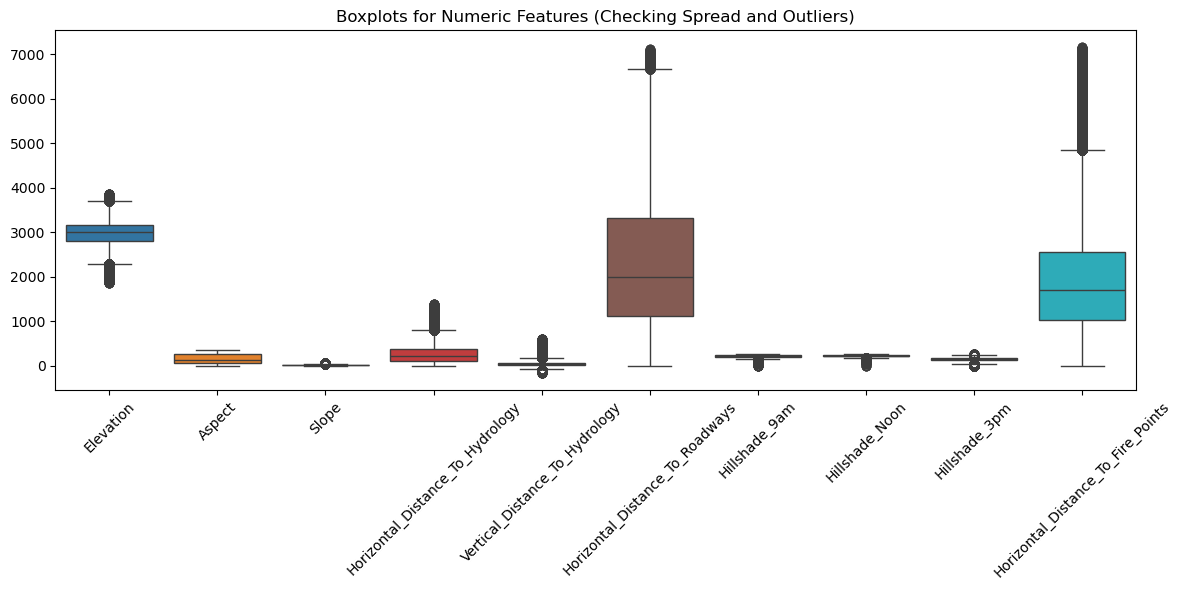

In [27]:
#### However, visualising  possible outliers in the numeric features of the Covertype dataset, without actually removing them.


# Select only numeric columns (excluding categorical/dummy variables)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Display first few numeric column names
print("Numeric columns:", list(numeric_cols)[:10])

# Plot boxplots for the first few numeric features (you can adjust the range)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols].iloc[:, :10])   # show first 10 numeric columns
plt.title("Boxplots for Numeric Features (Checking Spread and Outliers)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Performing  Training and Testing to the dataset

In [29]:
# --- 2. Train/Test/Validation Split ---
# Use stratification to ensure class proportions are maintained in each split.
# 60% Train, 20% Validation, 20% Test

# Splitting into (Train + Val) and Test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Splitting (Train + Val) into Train and Validation (0.25 of 80% is 20%)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")
print("-" * 50)


Training set shape: (348606, 54)
Validation set shape: (116203, 54)
Test set shape: (116203, 54)
--------------------------------------------------
